Consider a scenario where an
eavesdropper intercepts the cipher data on the public
channel. In order to retrieve the plaintext, the eavesdropper
must know the hybrid autoencoder architecture and the
trained weights of the decoder model.

Assuming the eavesdropper knows the network
structure, they will still require precise knowledge about the
weights applied to each synapse of the decoding network.

On a separate system (the eavesdropper’s computer), the
same architecture was trained on the same dataset for 100
epochs. The encrypted data obtained previously was fed as
input to the eavesdropper’s trained decoder network. Clearly, the sequence decoded by the eavesdropper’s trained network does not match the original
sequence . This demonstrates the
security feature of the proposed cryptosystem.
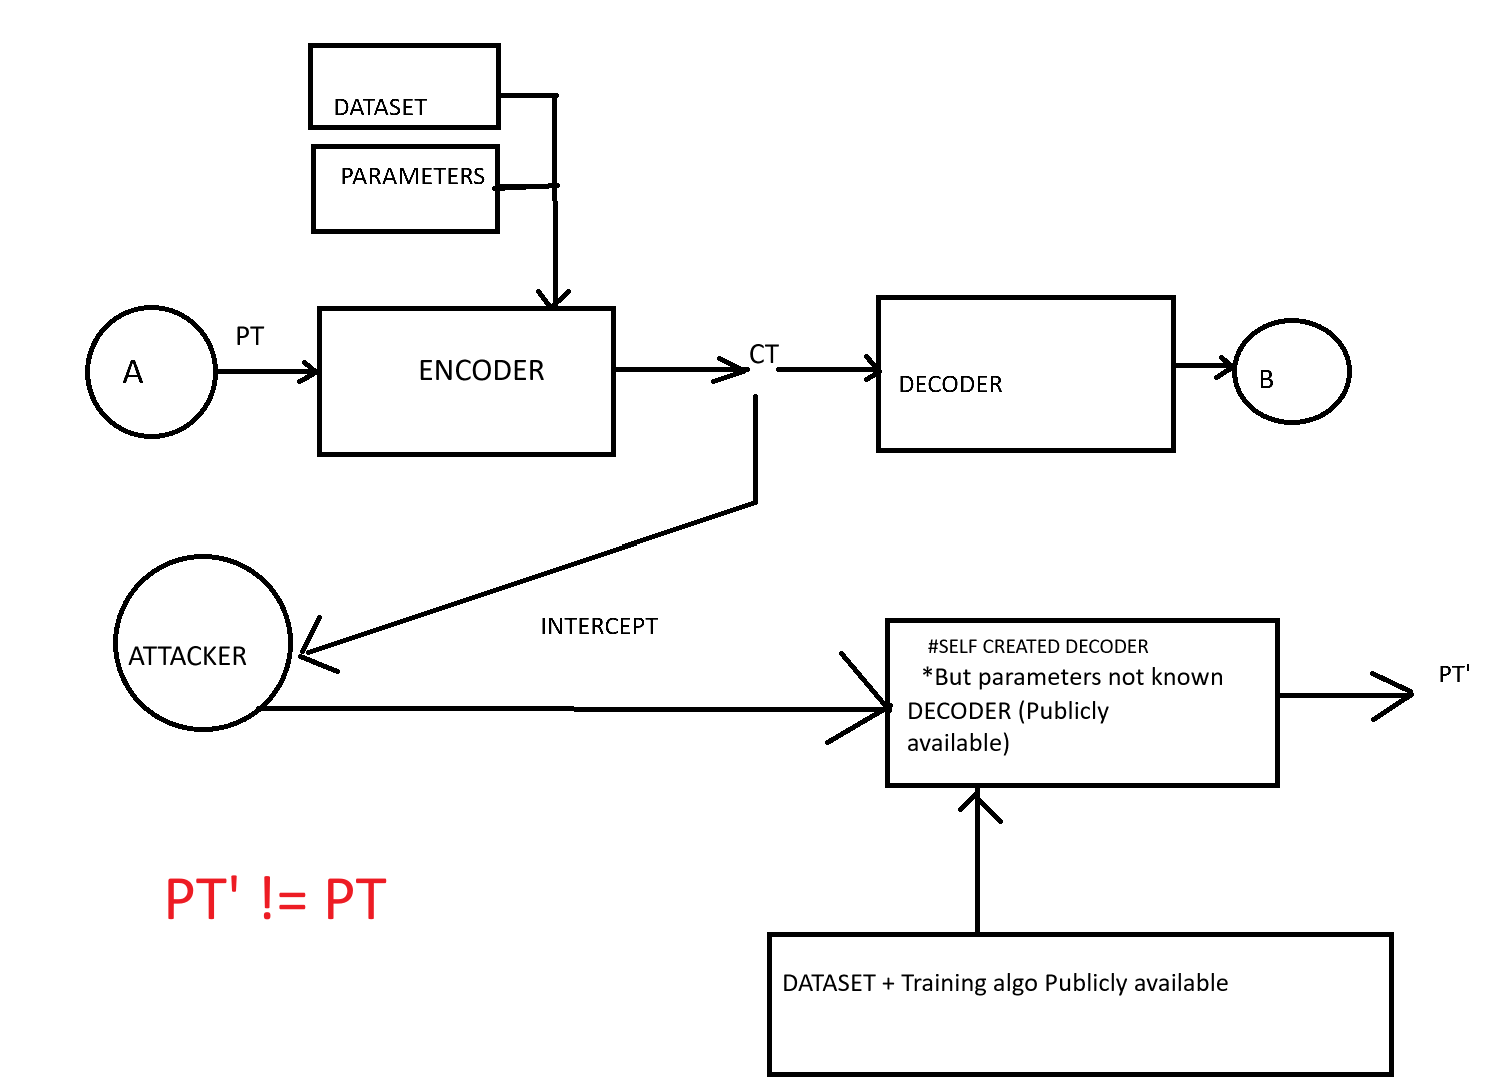

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
Datapath = "/content/drive/MyDrive/SecurityApplicationProject/binary_sequences_dataset.pth"
data = torch.load(Datapath)
dataset = TensorDataset(data, data)
dataloader = DataLoader(dataset, batch_size=5, shuffle=True)
class HybridAutoencoder(nn.Module):
    def __init__(self):
        super(HybridAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(8, 10),
            nn.LeakyReLU(negative_slope=0.5),
            nn.Linear(10, 8)
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 10),
            nn.LeakyReLU(negative_slope=0.5),
            nn.Linear(10, 8),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
model = HybridAutoencoder()
criterion = nn.MSELoss()
optimizer = optim.NAdam(model.parameters(), lr=0.001)
epochs = 100
for epoch in range(epochs):
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Save the model parameters
torch.save(model.state_dict(), 'eavesdropper_parameters.pth')


Epoch 1, Loss: 0.19291627407073975
Epoch 2, Loss: 0.15965282917022705
Epoch 3, Loss: 0.15902170538902283
Epoch 4, Loss: 0.18222935497760773
Epoch 5, Loss: 0.17779789865016937
Epoch 6, Loss: 0.11417659372091293
Epoch 7, Loss: 0.07422013580799103
Epoch 8, Loss: 0.051825396716594696
Epoch 9, Loss: 0.07801680266857147
Epoch 10, Loss: 0.08269753307104111
Epoch 11, Loss: 0.08104980736970901
Epoch 12, Loss: 0.049707457423210144
Epoch 13, Loss: 0.01786484569311142
Epoch 14, Loss: 0.01100299321115017
Epoch 15, Loss: 0.03269405663013458
Epoch 16, Loss: 0.04026341065764427
Epoch 17, Loss: 0.03021392598748207
Epoch 18, Loss: 0.032271839678287506
Epoch 19, Loss: 0.015444586984813213
Epoch 20, Loss: 0.03958858922123909
Epoch 21, Loss: 0.0029398687183856964
Epoch 22, Loss: 0.001855946145951748
Epoch 23, Loss: 0.0009217484039254487
Epoch 24, Loss: 0.041050978004932404
Epoch 25, Loss: 0.028151413425803185
Epoch 26, Loss: 0.01771792396903038
Epoch 27, Loss: 0.01069951057434082
Epoch 28, Loss: 0.00329433

#Testing if attacker can decrypt orignal Encrypted data (A->B)


Enter a passage in English: IITJ

Original Text: IITJ

Encrypted (Vector Format):

-2.0258, 2.2443, -1.5781, 1.3165, 2.6042, 4.7823, -1.7187, -1.1811; -2.0258, 2.2443, -1.5781, 1.3165, 2.6042, 4.7823, -1.7187, -1.1811; 5.0964, 0.2891, -5.8141, -3.8853, 2.7905, 2.7452, 2.6121, -1.4434; -3.6573, 3.2207, -2.3393, 0.0176, -2.4937, 5.7965, -6.2938, -2.9294

Decrypted Text: IITJ


In [ ]:
#Testing if attacker can decrypt orignal Encrypted data (A->B)
"""
Enter a passage in English: IITJ
Original Text: IITJ
Encrypted (Vector Format): -2.0258, 2.2443, -1.5781, 1.3165, 2.6042, 4.7823, -1.7187, -1.1811; -2.0258, 2.2443, -1.5781, 1.3165, 2.6042, 4.7823, -1.7187, -1.1811; 5.0964, 0.2891, -5.8141, -3.8853, 2.7905, 2.7452, 2.6121, -1.4434; -3.6573, 3.2207, -2.3393, 0.0176, -2.4937, 5.7965, -6.2938, -2.9294
Decrypted Text: IITJ
"""
def load_model(model_path):
    model = HybridAutoencoder()
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model
def string_to_ascii_binary(input_string):
    """Convert a string to a list of 8-bit binary representations of its ASCII characters."""
    return [format(ord(c), '08b') for c in input_string]

def binary_to_tensor(binary_list):
    """Convert a list of 8-bit binary strings to a tensor."""
    return torch.tensor([[int(bit) for bit in binary] for binary in binary_list], dtype=torch.float)

def tensor_to_binary(tensor):
    """Convert a tensor to a list of binary strings."""
    return [''.join(str(int(bit)) for bit in sequence) for sequence in tensor]

def binary_to_ascii(binary_list):
    """Convert a list of binary strings to their ASCII character equivalents."""
    return ''.join([chr(int(binary, 2)) for binary in binary_list])
def string_to_encrypted_vectors(encrypted_string):
    """Parse the encrypted string back into a list of tensors."""
    vector_strings = encrypted_string.split('; ')
    vectors = [torch.tensor([float(num) for num in vector.split(', ')], dtype=torch.float).unsqueeze(0) for vector in vector_strings]
    return vectors

def decrypt_encrypted_string(model, encrypted_string):
    """Decrypt an encrypted string back to text."""
    encrypted_vectors = string_to_encrypted_vectors(encrypted_string)
    decrypted_vectors = []
    with torch.no_grad():
        for vector in encrypted_vectors:
            decrypted_vector = model.decoder(vector)
            binarized_output = torch.where(decrypted_vector > 0.5, torch.tensor(1.0), torch.tensor(0.0))
            decrypted_vectors.append(binarized_output)
    decrypted_binaries = tensor_to_binary(torch.cat(decrypted_vectors))
    decrypted_text = binary_to_ascii(decrypted_binaries)
    return decrypted_text

if __name__ == "__main__":
    model_path = 'eavesdropper_parameters.pth'
    model = load_model(model_path)

    # Assuming you have an encrypted string (from previous steps or stored separately)
    encrypted_string = input("Encrypted string: ") # Replace with your actual encrypted string
    decrypted_text = decrypt_encrypted_string(model, encrypted_string)

    print(f"Decrypted Text from Encrypted String: {decrypted_text}")

Encrypted string: -2.0258, 2.2443, -1.5781, 1.3165, 2.6042, 4.7823, -1.7187, -1.1811; -2.0258, 2.2443, -1.5781, 1.3165, 2.6042, 4.7823, -1.7187, -1.1811; 5.0964, 0.2891, -5.8141, -3.8853, 2.7905, 2.7452, 2.6121, -1.4434; -3.6573, 3.2207, -2.3393, 0.0176, -2.4937, 5.7965, -6.2938, -2.9294
Decrypted Text from Encrypted String: ààä


Experiment Sucessful as even though attacker had architecture , dataset , training algorithm , but couldnt find(recreate ) the key (orignal trainable parameters) and hence didnt find the real PT

PT = IITJ

PT' = ààä

Clearly PT' != PT

In [ ]:
############ Next Experiment : ##############

#DIFFUSION (1 bit change)

To test the security of the proposed cryptosystem, an
analysis was performed to compute the level of confusion
in the encrypted 8-dimensional vectors. To do this, two 8-
bit binary ASCII sequences (with only 1-bit being
different) were taken and passed through the trained
encoder networks.

In [ ]:
import torch
import torch.nn as nn
class HybridAutoencoder(nn.Module):
    def __init__(self):
        super(HybridAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(8, 10),
            nn.LeakyReLU(negative_slope=0.5),
            nn.Linear(10, 8)
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 10),
            nn.LeakyReLU(negative_slope=0.5),
            nn.Linear(10, 8),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
model = HybridAutoencoder()

model_path = '/content/drive/MyDrive/SecurityApplicationProject/hybrid_autoencoder_parameters.pth'
model.load_state_dict(torch.load(model_path))

model.eval()

test_input1 = torch.tensor([[0, 0, 0, 1, 0, 1, 0, 0]]).float()
test_input2 = torch.tensor([[0, 0, 0, 1, 0, 1, 0, 1]]).float() #LAST BIT OF INPUT1 (0) CHANGED IN INPUT2 (TO 1)
print('INPUT1:',test_input1.numpy())
print('INPUT2:',test_input2.numpy())
with torch.no_grad():
    encrypted_vector1 = model.encoder(test_input1)
    print('Encrypted vector 1:', encrypted_vector1.numpy())
    encrypted_vector2 = model.encoder(test_input2)
    print('Encrypted vector 2:', encrypted_vector2.numpy())






INPUT1: [[0. 0. 0. 1. 0. 1. 0. 0.]]
INPUT2: [[0. 0. 0. 1. 0. 1. 0. 1.]]
Encrypted vector 1: [[ 3.636365  -1.0726545 -4.3179145 -1.2177658  1.7983096  3.031691
   5.025161  -1.2898569]]
Encrypted vector 2: [[ 1.7972081 -0.4315511 -2.8271768 -0.9771846  4.2865844  3.806038
   6.352584   1.5434461]]


#CONFUSION

Let's see if the relationship between CT and Key (Trainable Parameters) is obscured or not



In [ ]:
#PLAINTEXT
test_input = torch.tensor([[0, 1, 0, 1, 1, 0, 1, 0]]).float()

#key1 (orignal)
import torch
import torch.nn as nn
class HybridAutoencoder(nn.Module):
    def __init__(self):
        super(HybridAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(8, 10),
            nn.LeakyReLU(negative_slope=0.5),
            nn.Linear(10, 8)
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 10),
            nn.LeakyReLU(negative_slope=0.5),
            nn.Linear(10, 8),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
model = HybridAutoencoder()
model_path = '/content/drive/MyDrive/SecurityApplicationProject/hybrid_autoencoder_parameters.pth'
model.load_state_dict(torch.load(model_path))
model.eval()
with torch.no_grad():
    encrypted_vector = model.encoder(test_input)
    print('Encrypted vector (Key 1):', encrypted_vector.numpy())

#key2 (attacker)
class HybridAutoencoder(nn.Module):
    def __init__(self):
        super(HybridAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(8, 10),
            nn.LeakyReLU(negative_slope=0.5),
            nn.Linear(10, 8)
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 10),
            nn.LeakyReLU(negative_slope=0.5),
            nn.Linear(10, 8),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
model = HybridAutoencoder()
model_path = '/content/drive/MyDrive/SecurityApplicationProject/eavesdropper_parameters.pth'
model.load_state_dict(torch.load(model_path))
model.eval()
with torch.no_grad():
    encrypted_vector = model.encoder(test_input)
    print('Encrypted vector (Key2):', encrypted_vector.numpy())

Encrypted vector (Key 1): [[ 0.02202405  1.4976857  -1.5635588  -2.3500974  -1.4465282   9.93152
  -3.9664261  -3.7735186 ]]
Encrypted vector (Key2): [[ 0.3240664   4.806244    3.1912541   1.494319    5.330694   -1.4532077
   0.2639295   0.07660858]]


In [ ]:
def load_model(model_path):
    model = HybridAutoencoder()
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model

def print_trainable_parameters(model):
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f"{name}:\n{param.data}\n")

if __name__ == "__main__":
    key1 = '/content/drive/MyDrive/SecurityApplicationProject/hybrid_autoencoder_parameters.pth'
    model = load_model(key1)
    print("Trainable Parameters Key1:")
    print_trainable_parameters(model)
    print("---------------------------------------------------------------------------------------------")
    key2 = '/content/drive/MyDrive/SecurityApplicationProject/eavesdropper_parameters.pth'
    model = load_model(key2)
    print("Trainable Parameters Key2:")
    print_trainable_parameters(model)



Trainable Parameters Key1:
encoder.0.weight:
tensor([[ 0.4832,  0.6348,  1.1742, -0.4017,  0.4423,  1.0438, -0.4026, -0.3519],
        [ 0.7521,  0.6336, -0.0962, -0.3559, -0.5068, -0.9621, -0.1647, -2.2441],
        [ 0.1270,  0.4290, -1.1313,  1.5556,  0.8199,  0.8464, -0.2424, -0.3652],
        [-0.7111,  0.4099, -0.0504,  0.2624,  1.2334,  0.8216, -0.1238, -0.2154],
        [-0.6092,  0.2624,  0.7857,  1.0690, -0.0418,  0.5797, -1.3106,  0.9779],
        [ 1.3140, -0.3866,  0.7793,  1.5291,  0.3176, -0.7445, -0.0047, -0.0032],
        [-0.0466,  0.8150,  0.0669, -0.1912,  0.3203, -0.1942,  1.8013,  0.2016],
        [ 1.0001, -1.0203,  0.2723, -0.3255,  1.3231,  0.8737,  0.5347,  0.1124],
        [-0.4592,  0.4121,  0.8272,  0.4380,  1.4842, -0.6571,  0.6885,  0.4773],
        [ 1.0962,  0.7509,  0.0753,  0.3261, -0.4219,  0.8933,  0.4640,  0.6831]])

encoder.0.bias:
tensor([-0.3261,  0.4466,  0.1230, -0.0861,  0.0745, -0.0484,  0.0280,  0.2318,
        -0.4249, -0.5089])

encoder.2

#Key Space Analysis

Any cryptosystem's key space should be exceedingly
large in order to give an attacker a very large number of key
combinations from which to obtain the plaintext. For the
proposed architecture, the number of trainable variables
(weights and biases) i.e. the number of keys in the
decoder/decryption system is 178. Based on frequent
observations, the values of these keys predominantly lie in
the range (-1, 1) which will be the range considered for this
analysis. The minimum variation in the values of the
decoder weights, which resulted in an incorrect decryption,
was observed to be in the range 0.203 and 0.288. Hence the
number of possible key values for each integer in the range
(-1,1) is in the range (3.4722, 4.9261). Based on these
values, the key space lies in the range[(2 x 3.4722)^178,
(2 x 4.9261)^178] > 2^178. As a result, the suggested
algorithm's key space is large enough to withstand brute
force attacks.

In [ ]:
################################# DONE##########################################